<a href="https://colab.research.google.com/github/Anshuldogra001/cat-dog_Training_set/blob/main/Rock_paper_scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock-Paper-Scissor



## Download and Prepare the Dataset

we will be using the [Rock-Paper-Scissors dataset](http://www.laurencemoroney.com/rock-paper-scissors-dataset/), a gallery of hands images in Rock, Paper, and Scissors poses.

In [15]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-05-28 06:13:07--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M   310MB/s    in 0.6s    

2022-05-28 06:13:08 (310 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]

--2022-05-28 06:13:08--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.69.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test

In [16]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

We will assign the directory names into variables and look at the filenames as a sanity check.

In [17]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-043.png', 'rock01-008.png', 'rock01-027.png', 'rock05ck01-040.png', 'rock07-k03-105.png', 'rock03-101.png', 'rock02-064.png', 'rock03-060.png', 'rock05ck01-112.png', 'rock04-082.png']
['paper02-069.png', 'paper01-046.png', 'paper01-117.png', 'paper02-000.png', 'paper02-079.png', 'paper01-087.png', 'paper05-105.png', 'paper04-012.png', 'paper02-008.png', 'paper01-069.png']
['testscissors01-059.png', 'scissors01-031.png', 'testscissors02-060.png', 'scissors01-028.png', 'scissors03-113.png', 'scissors01-005.png', 'testscissors01-063.png', 'scissors04-019.png', 'testscissors02-006.png', 'scissors04-018.png']


Let's view some images...

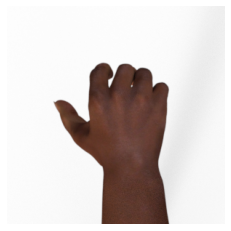

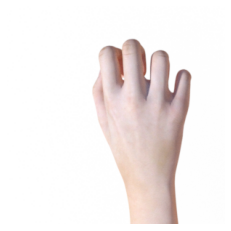

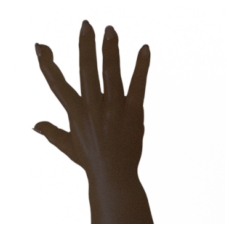

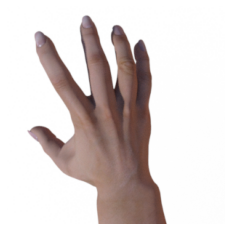

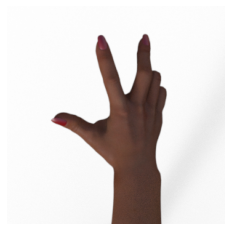

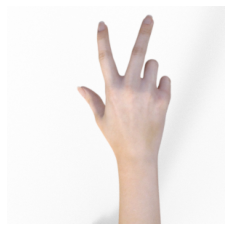

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Build the model

we will then build your CNN so that we can examine the architecture with `model.summary()` below.

In [19]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [20]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Prepare the ImageDataGenerator

we will prepare the generators as before. we will set the training set up for data augmentation so it can mimick other poses that the model needs to learn.

In [21]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [22]:
# Train the model
history = model.fit(train_generator, epochs=5, steps_per_epoch=10, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/5
10/10 [==============================] - 13s 1s/step - loss: 2.3233 - accuracy: 0.3429 - val_loss: 1.0950 - val_accuracy: 0.3333
Epoch 2/5
10/10 [==============================] - 11s 1s/step - loss: 1.0977 - accuracy: 0.3270 - val_loss: 1.0873 - val_accuracy: 0.4274
Epoch 3/5
10/10 [==============================] - 11s 1s/step - loss: 1.0914 - accuracy: 0.3762 - val_loss: 1.0952 - val_accuracy: 0.3333
Epoch 4/5
10/10 [==============================] - 11s 1s/step - loss: 1.0827 - accuracy: 0.4214 - val_loss: 1.0147 - val_accuracy: 0.4651
Epoch 5/5
10/10 [==============================] - 11s 1s/step - loss: 1.0672 - accuracy: 0.4262 - val_loss: 1.0617 - val_accuracy: 0.6156


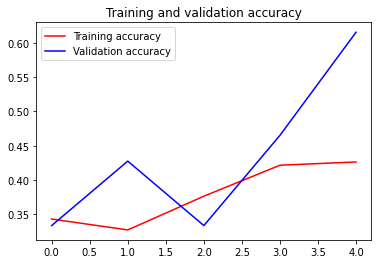

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Model Prediction
we should be able to upload an image here and have it classified without crashing.

In [24]:


import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving Screenshot (11).png to Screenshot (11).png
Screenshot (11).png
[[2.1046426e-23 6.6586921e-04 9.9933416e-01]]


The third number which is 9.9933416e-01 is showing that it is scissor.

#Thank You..